## Thanks for visiting my notebook! If I have mistakes, let me know.

## In this notebook, I focused on exam scores with ethnic(Don't worry there is nothing with real ethnics :) )

 Contents:
 <br>
*        [EDA](#1) 
*        [Organizing Dataset for Unsupervised Learning](#2)
*        [KMeans Clustering](#3)
*        [Hierarchical Clustering](#4)
*        [Conclusion](#5) 

In [1]:
import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

import os
print(os.listdir("../input"))



['StudentsPerformance.csv']


<div id="1"/><br>
## 1-  EDA


In some columns names there was a gaps. That's why I wanted to change their names for clean programming.

In [2]:
df = pd.read_csv("../input/StudentsPerformance.csv")
df.rename(index = int, columns = {"race/ethnicity":"ethnicity"},inplace=True)

In [3]:
df.head()

,gender,ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.tail()

,gender,ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


<div id="2"/><br>
## 2 - Organizing Dataset for Unsupervised Learning

I just want to use only these columns. I just want to relate these values with ethnics. And of course I just renamed them . 

In [5]:
scores = df.loc[:,["math score","reading score","writing score"]]
scores.rename(index = int, columns = {"math score":"mthscore","reading score":"readscr","writing score":"writingscr"},inplace=True)

Let's see what we have !! 

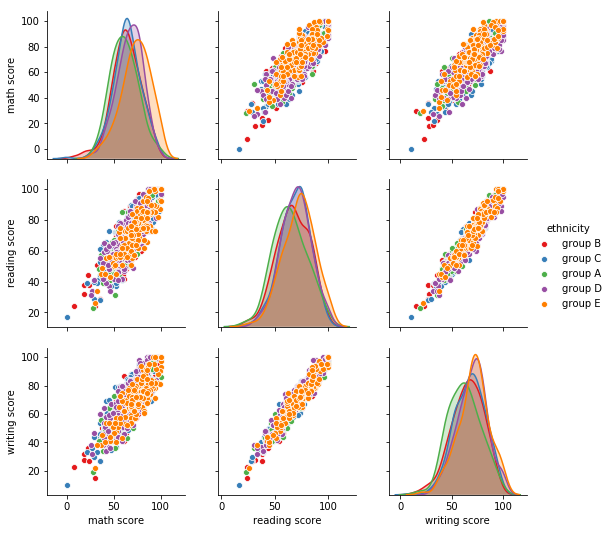

In [6]:
import seaborn as sns

sns.pairplot(data = df,hue="ethnicity",palette="Set1")
plt.show()

<div id="3"/><br>
## KMeans Clustering

We are starting with importing KMeans.

In [7]:
from sklearn.cluster import KMeans

In [8]:
wcss = []


What is WCSS ( Within Cluster Sum of Squares) ? is a formula ;
![KMeanClustering](http://www.semspirit.com//wp-content/uploads/sites/17154/2017/12/KMEANS-WCSS-DEF-1024x386.png)

Let's guess our K value which will be best for our data.

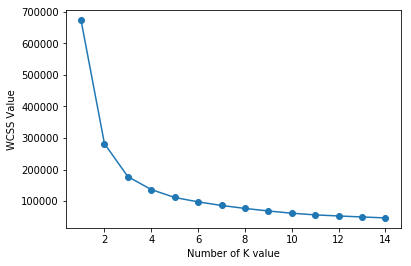

In [9]:
for i in range(1,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scores)
    wcss.append(kmeans.inertia_)


plt.plot(range(1,15),wcss,"-o")
plt.xlabel("Number of K value")
plt.ylabel("WCSS Value")
plt.show()

As you see in this graph. Elbowing point will be the best K value for these clustering. 5 is selected as a K value. Now implementing the code

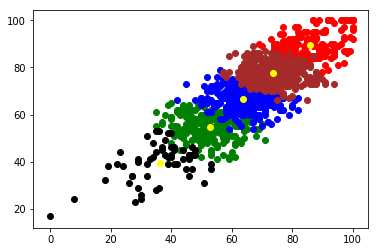

In [10]:
kmeans2 = KMeans(n_clusters = 5)
clusters = kmeans2.fit_predict(scores)
scores["examscores"] = clusters


plt.scatter(scores.mthscore[scores.examscores == 0],scores.readscr[scores.examscores == 0],color="red")
plt.scatter(scores.mthscore[scores.examscores == 1],scores.readscr[scores.examscores == 1],color="green")
plt.scatter(scores.mthscore[scores.examscores == 2],scores.readscr[scores.examscores == 2],color="blue")
plt.scatter(scores.mthscore[scores.examscores == 3],scores.readscr[scores.examscores == 3],color="black")
plt.scatter(scores.mthscore[scores.examscores == 4],scores.readscr[scores.examscores == 4],color="brown")
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color="yellow")
plt.show()

<div id="4"/><br>
## Hierarchical Clustering

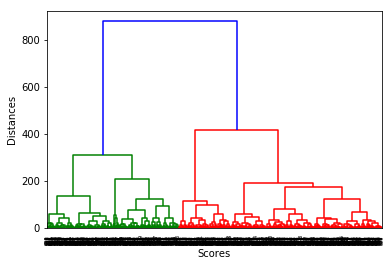

In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(scores, method = "ward")
dendrogram(merg,leaf_rotation=90)
plt.xlabel("Scores")
plt.ylabel("Distances")
plt.show()

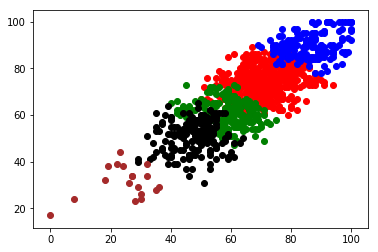

In [12]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="ward")
cluster = hc.fit_predict(scores)

scores["examscores"] = cluster
plt.scatter(scores.mthscore[scores.examscores == 0],scores.readscr[scores.examscores == 0],color="red")
plt.scatter(scores.mthscore[scores.examscores == 1],scores.readscr[scores.examscores == 1],color="green")
plt.scatter(scores.mthscore[scores.examscores == 2],scores.readscr[scores.examscores == 2],color="blue")
plt.scatter(scores.mthscore[scores.examscores == 3],scores.readscr[scores.examscores == 3],color="black")
plt.scatter(scores.mthscore[scores.examscores == 4],scores.readscr[scores.examscores == 4],color="brown")
plt.show()

<div id="5"/><br>
## Conclusion

As a conclusion in some areas scores are close themself. That's the point I try to explain choosing K value depend on algorithm. We knew number of clusters was 5 at the beginning. 